**Data Reading and Preparing**

In [1]:
#Read data
import numpy as np
from sklearn.model_selection import train_test_split
data = np.loadtxt('regression_x_t.txt')
m = len(data)
X = data[:,0]
Y = data[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)
m_train = len(X_train)
m_test = len(X_test)


**Gaussion Basis Function**

Reference: Python Data Science Handbook by Jake VanderPlas

20 kernel Gaussion Regression Using Sklearn 

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(X_train[:, np.newaxis], Y_train)
Y_predict = gauss_model.predict(X_test[:, np.newaxis])


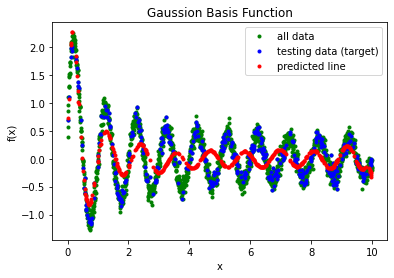

In [7]:
import matplotlib.pyplot as plt
l_all = plt.plot(X,Y,"g.",label ="all data")
l_test = plt.plot(X_test,Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test,Y_predict,"r.", label = "predicted line")
plt.title("Gaussion Basis Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.3372565832441384


**Sigmoidal Basis Function**

In [9]:
from scipy.optimize import curve_fit

def sigmoid(x, k, x0, w0, w1, w2):

    return w0+ w1*(1.0 / (1 + np.exp(-k * (x - x0))))+ w2 * ((1.0 / (1 + np.exp(-k * (x - x0))))**2)


# Fit the curve
popt, pcov = curve_fit(sigmoid, X_train, Y_train)
print(popt)
estimated_k, estimated_x0, estimated_w0, estimated_w1, estimated_w2 = popt

# Plot the fitted curve
Y_predict = sigmoid(X_test, k=estimated_k, x0=estimated_x0, w0=estimated_w0, w1 = estimated_w1, w2 = estimated_w2)

[ 10.02567186   0.63843685   1.83713905 -10.10297576   8.27738218]


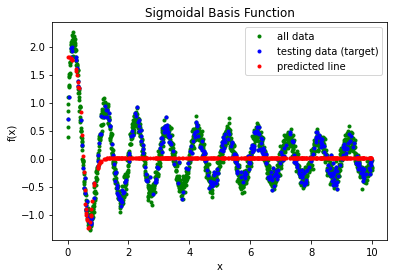

In [10]:
import matplotlib.pyplot as plt
l_all = plt.plot(X,Y,"g.",label ="all data")
l_test = plt.plot(X_test,Y_test,"b.",label ="testing data (target)")
l_predict = plt.plot(X_test,Y_predict,"r.", label = "predicted line")
plt.title("Sigmoidal Basis Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, Y_predict,squared=False)
print (rmse)

0.3543736851796031
